<h2 align='center'> SPAM-MESSAGE-CLASSFICATION </h2>

##### They say wherever there is good there is bound to be bad too, that is the same case that we see over the internet,even though internet is one of the most amazing thing created by humans it is also the worst.And like everything else the more big something gets the more difficult it gets to manage that.<br> We all must have gotten a spam message atleast once in a lifetime, the same message where they say things as if we do not get that it will be the end of the world

<p align='center'><img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUdr3MDct1x5fw4DhnL9qjGX-lt_cNg0oR6w&usqp=CAU" />

##### Below we will use NLP and create a spam message classification that will easily differentiate between a spam message and non-one

### Problem Statement:
-  To classify the Mails as HAM(non-spam) or SPAM using machine learning or deep learning model.

### 1.Data Preprocessing

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
file ="/content/drive/MyDrive/Colab Notebooks/Natural learning process/spam_message_classification/spam_message.tsv"
df = pd.read_csv(file,sep = '\t')

In [147]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [148]:
df.isnull().sum().sum()

0

In [149]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [150]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


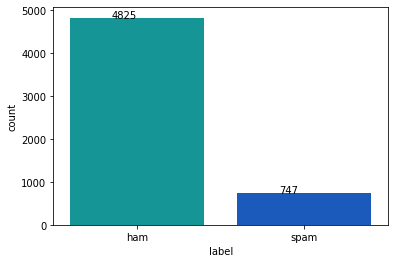

In [151]:
ax = sns.countplot(df['label'],palette='winter_r');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [152]:
df['label'].value_counts() / (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

- as we can see we have an imbalanced dataset so we can either undersampling or oversampling to balance the dataset

In [153]:
ham = df[df['label'] =='ham']
spam = df[df['label'] =='spam']

print(ham.shape,spam.shape)

(4825, 4) (747, 4)


In [154]:
ham = ham.sample(spam.shape[0])

what the above code will do is it will take 747 samples from ham and it will balance out both ham and spam

In [155]:
print(ham.shape,spam.shape)

# as we can see now we have equal number of data

(747, 4) (747, 4)


- let us combine both ham and spam into a new variable called data

In [156]:
data = ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

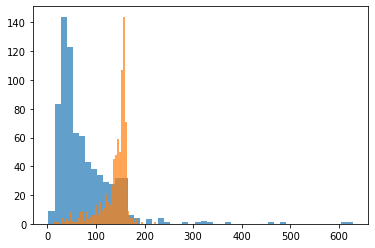

In [157]:
plt.hist(data[data['label'] == 'ham']['length'],bins=50,alpha=0.7);
plt.hist(data[data['label'] == 'spam']['length'],bins=50,alpha=0.7);
plt.show()

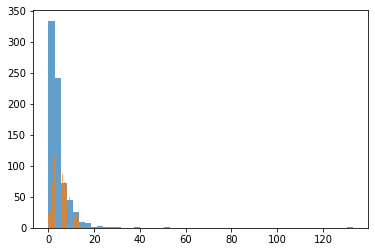

In [158]:
plt.hist(data[data['label'] == 'ham']['punct'],bins=50,alpha=0.7);
plt.hist(data[data['label'] == 'spam']['punct'],bins=50,alpha=0.7);
plt.show()

### Train-test-split

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [160]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1045,) (449,)
(1045,) (449,)


### TFIDF and Random Forest

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [162]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),
              ('classifier',RandomForestClassifier(n_estimators=10))])

In [163]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [164]:
y_pred = classifier.predict(X_test)
y_test = np.array(y_test)
result = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
results = pd.DataFrame(result,columns = ['predicted','actual'])
results

,predicted,actual
0,spam,spam
1,spam,spam
2,spam,spam
3,ham,ham
4,spam,spam
...,...,...
444,ham,spam
445,spam,spam
446,ham,ham
447,ham,spam


### accuracy_Score and confusion_matrix

In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [166]:
print("accuracy:",accuracy_score(y_pred,y_test))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_pred,y_test))
print('\n')
print('claasification_report')
print(classification_report(y_pred,y_test))

accuracy: 0.933184855233853


confusion_matrix
[[226  29]
 [  1 193]]


claasification_report
              precision    recall  f1-score   support

         ham       1.00      0.89      0.94       255
        spam       0.87      0.99      0.93       194

    accuracy                           0.93       449
   macro avg       0.93      0.94      0.93       449
weighted avg       0.94      0.93      0.93       449



### support vector

In [167]:
from sklearn.svm import SVC
svm = Pipeline([('tfidf',TfidfVectorizer()),
              ('classifier',SVC(C= 100,gamma='auto'))])

In [168]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [169]:
y_pred2 = svm.predict(X_test)
y_test = np.array(y_test)
result = np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1)
results = pd.DataFrame(result,columns = ['predicted','actual'])
results

,predicted,actual
0,spam,spam
1,spam,spam
2,spam,spam
3,ham,ham
4,spam,spam
...,...,...
444,ham,spam
445,spam,spam
446,ham,ham
447,spam,spam


In [170]:
print("accuracy:",accuracy_score(y_pred2,y_test))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_pred2,y_test))
print('\n')
print('claasification_report')
print(classification_report(y_pred2,y_test))

accuracy: 0.9599109131403119


confusion_matrix
[[226  17]
 [  1 205]]


claasification_report
              precision    recall  f1-score   support

         ham       1.00      0.93      0.96       243
        spam       0.92      1.00      0.96       206

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



#### let us create a new strings and check if our model can correclty predict

In [171]:
test1 = ['Hurray! you win a jackpot account can be credited with $1 million click the link below or call 9992222266']
test2 = ['Good job in completeing this course good luck.']
test3 = ['Congratulations, You won a lottery ticket worth $2 million! call this number to claim it']

In [172]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


- even though it has predicted the 2nd and 3rd correctly 1st one is wrong
- if we increase the n_estimators =100 our model will predict both correctly

In [173]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['spam']
['ham']
['spam']


- so as we can see SVM works the best for our dataset since it has accurately predicted all the results